# Импорт библиотек

In [3]:
# импортируем библиотеки
import pandas as pd # https://pandas.pydata.org/docs/reference/frame.html#dataframe

# Pandas

## Типы данных

### DataFrame

**Датафрейм** - это двухмерная структура, у неё есть колонки и строки. У колонок есть названия, а у строки — индекс (неформально говоря, номер).

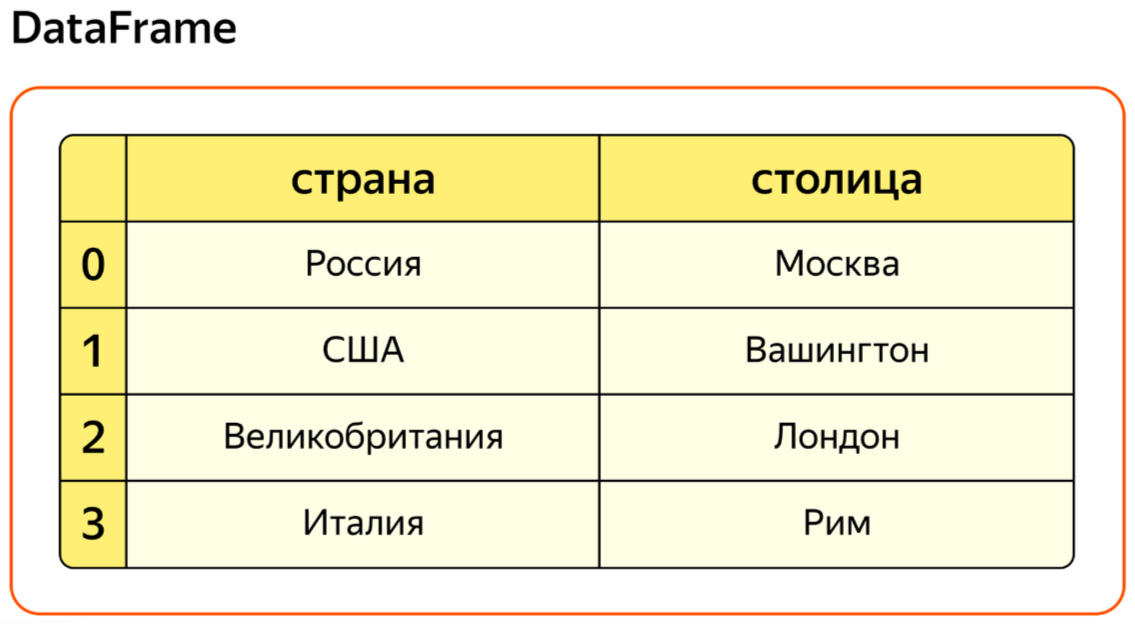

### Series

Объект датафрейм состоит из объектов типа серия. Если мы обратимся к конкретной колонке или строке датафрейма, то будем работать уже с объектом типа серия.

У серий есть несколько атрибутов, основные — два:   
* название name  
* тип объектов в ячейках dtype (англ. data type — тип данных).

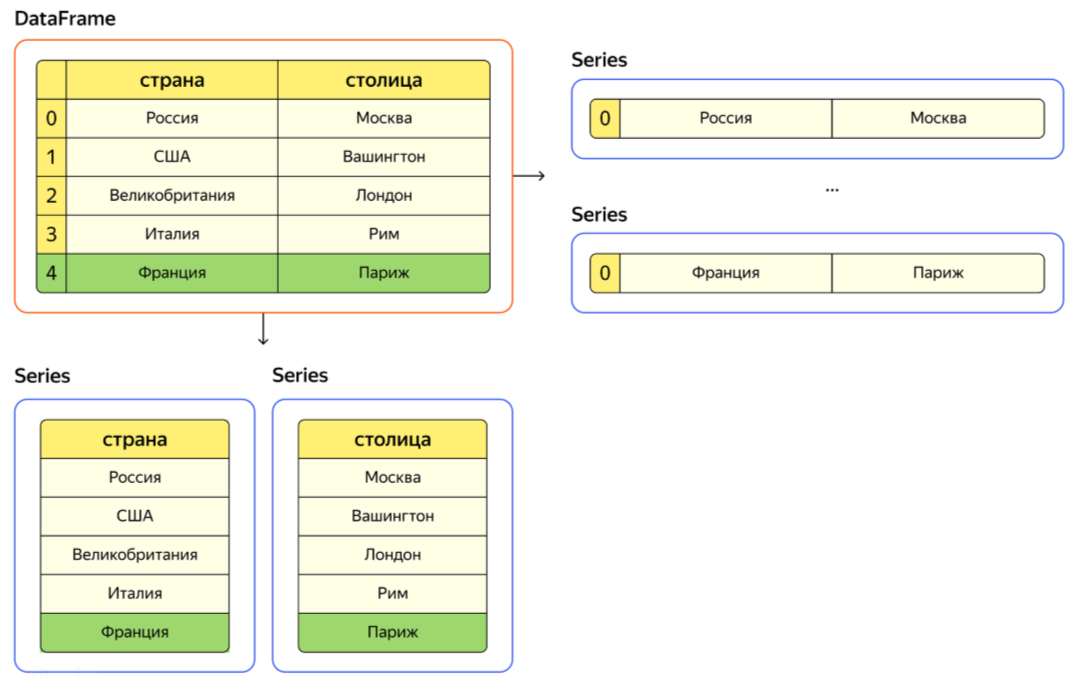

## Создание и наполнение DataFrame вручную

In [4]:
# Создадим пустой DataFrame
df = pd.DataFrame()
print(f'{df}\n{type(df)}')

Empty DataFrame
Columns: []
Index: []
<class 'pandas.core.frame.DataFrame'>


**Дополнительные параметры**  
При создании датафрейма, мы можем указать специальные параметры. Они определяют то, какие данные и каким именно образом будут храниться в датафрейме:  
* data — содержимое DataFrame;  
* index — значения индексов в DataFrame;  
* columns — название колонок в DataFrame.  
Представить это можно примерно так:

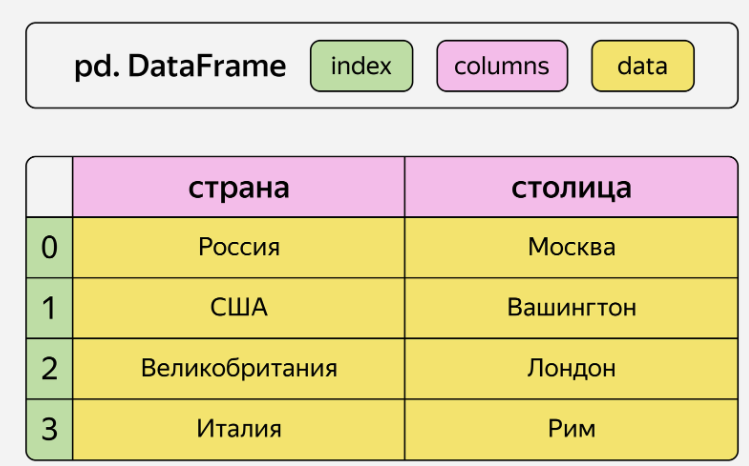

In [5]:
# создаем пустой DataFrame
df_countries = pd.DataFrame()

# создаем Series для наполнения DataFrame
country = pd.Series(['Россия', 'США', 'Великобритания', 'Италия'])
capital = pd.Series(['Москва', 'Вашингтон', 'Лондон', 'Рим'])

In [6]:
# передаем в DataFrame поля
df_countries['Страна'] = country # в квадратных скобках указываем название будущего поля
df_countries['Столица'] = capital

# смотрим на данные
display(df_countries)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


**Повторим алгоритм:**  
1) Создать пустой датафрейм.  
2) Создать объекты Series под каждую колонку.  
3) Присвоить каждой колонке свой Series.  

Всё то же самое можно сделать и без объектов Series, а используя лишь списки. Такой способ тоже правильный и на практике он встречается чаще, так как код выглядит проще:

In [7]:
df_countries_2 = pd.DataFrame()

df_countries_2['Страна'] = ['Россия', 'США', 'Великобритания', 'Италия']
df_countries_2['Столица'] = ['Москва', 'Вашингтон', 'Лондон', 'Рим']

display(df_countries_2)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


## Наполнение DataFrame на основе списка

Один из способов представить данные в табличном виде — это использовать вложенные списки. Ещё их называют двумерными. 

In [8]:
list_countries = [['Россия', 'Москва'], 
                  ['США', 'Вашингтон'], 
                  ['Великобритания', 'Лондон'], 
                  ['Италия', 'Рим']]

Представьте, что вы работаете со списком, где каждый элемент — это строка в таблице. Каждый вложенный список является очередной строкой в датафрейме, а значения в нём разделены по колонкам. 

In [9]:
# передаем в DataFrame в параметр data наш список списков
df_countries_3 = pd.DataFrame(data = list_countries)

# равнозначно предыдущему
df_countries_4 = pd.DataFrame(list_countries)

# возвращаем результаты
display(df_countries_3)
display(df_countries_4)

,0,1
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


,0,1
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


Итак, мы наполнили датафрейм значениями, но у колонок нет названий, вместо них числа 0 и 1. Добавим названия наших колонок, используя параметр columns

In [10]:
# Создаем DataFrame из списка списков и даем имена полям
df_countries_3 = pd.DataFrame(data = list_countries, columns = ['Страна', 'Столица'])

# выводим результат
display(df_countries_3)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


Ещё один способ дать названия колонкам — обратиться к атрибуту columns в датафрейме. Этот атрибут хранит названия для колонок в виде списка.

In [11]:
df_countries_3.columns = ['Country', 'Capital']

display(df_countries_3)

,Country,Capital
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


Если мы пропустим элемент в списке, то в датафрейм запишется пустое значение или None, при этом ошибки не будет и программа не остановится:

In [12]:
list_countries_2 = [['Россия', 'Москва'],
                  ['Вашингтон'], # Пропустили США
                  ['Великобритания', 'Лондон'],
                  ['Италия']] # Пропустили Рим

df_countries_4 = pd.DataFrame(data=list_countries_2, columns=['Страна', 'Столица'])

display(df_countries_4) 

,Страна,Столица
0,Россия,Москва
1,Вашингтон,None
2,Великобритания,Лондон
3,Италия,None


## Наполнение DataFrame на основе словаря

Разберём способ «ключ — колонка». В нём ключи словаря — это названия колонок, а значения — набор значений в колонке. Вы уже знаете, что Series подходит для хранения значений в колонке. 

In [13]:
# создаем словарь по методу "Ключ - Колонка"
dict_countries = {
    'Страна' : pd.Series(['Россия', 'США', 'Великобритания', 'Италия']),
    'Столица' : pd.Series(['Москва', '', 'Лондон', 'Рим'])
}

In [14]:
# передаем словарь в аргумент data
df_countries_5 = pd.DataFrame(data = dict_countries)

# смотрим на данные
display(df_countries_5)

,Страна,Столица
0,Россия,Москва
1,США,
2,Великобритания,Лондон
3,Италия,Рим


Попробуем передать разные типы данных 

In [15]:
# создаем словарь
dict_data_types = {
    'Строка': ['Иван', 'Август', 'Автомобиль'],
    'Целое число' : ['1', '3', '5'],
    'Десятичное число' : ['0.5', '1.2', '3.14'],
    'Логический тип данных' : [True, True, False]
}

# передаем словарь в аргумент data
df_data_types = pd.DataFrame(data = dict_data_types)

# смотрим на данные
display(df_data_types)

,Строка,Целое число,Десятичное число,Логический тип данных
0,Иван,1,0.5,True
1,Август,3,1.2,True
2,Автомобиль,5,3.14,False


Рассмотрим ещё один способ сохранить данные на основе словаря. Используем список, где каждый элемент — строка таблицы в виде словаря. Ключ словаря — название колонки, значение — значение колонки для этой строки. Получается набор записей.

In [16]:
# создаем словарь
dict_countries_2 = [
    {'Страна' : 'Россия', 'Столица' : 'Москва'},
    {'Страна' : 'США', 'Столица' : 'Вашингтон'},
    {'Страна' : 'Великобритания', 'Столица' : 'Лондон'},
    {'Страна' : 'Италия', 'Столица' : 'Рим'},
]

# передаем словарь в аргумент data
df_countries_6 = pd.DataFrame(data = dict_countries_2)

# смотрим на данные
display(df_countries_6)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


## Выгрузка датафрейма из файла

### CSV 

In [17]:
# выгрузим csv файл и создадим на ег ооснове DataFrame
df_art_1 = pd.read_csv('datasets/arts.csv')

# вглянем на данные в csv файле
display(df_art_1)

,Картина,Автор,Год
0,Звёздная ночь,Ван Гог Винсент,1889
1,Крик,Мунк Эдвард,1910
2,Неизвестная,Крамской Иван,1883
3,Итальянский полдень,Брюллов Карл,1827
4,Рожь,Шишкин Иван,1878
5,Девятый вал,Айвазовский Иван,1850


При использовании функции ```read_csv()``` можно указать параметр ```sep```, который определяет символ, используемый в качестве разделителя. Поскольку **CSV**-файлы по умолчанию используют запятую в качестве разделителя, её можно не указывать явно.  

Аргумент ```index_col``` в функции ```pd.read_csv()``` позволяет указать, какой столбец следует использовать в качестве индекса **DataFrame**.

```df = pd.read_csv('file.csv', index_col='имя_столбца')```

In [18]:
# взглянем на типы данных в колонках DataFrame

print(df_art_1.dtypes)

Картина    object
Автор      object
Год         int64
dtype: object


Рассмотрим пример разделения записей в DataFrame чем-то иным чем запятой

In [19]:
# прочитаем csv
df_art_2 = pd.read_csv('datasets/arts2.csv')

# посмотрим на данные
display(df_art_2)

# записи разделены табуляцией

,Картина\tАвтор\tГод
0,Звёздная ночь\tВан Гог Винсент\t1889
1,Крик\tМунк Эдвард\t1910
2,Неизвестная\tКрамской Иван\t1883
3,Итальянский полдень\tБрюллов Карл\t1827
4,Рожь\tШишкин Иван\t1878
5,Девятый вал\tАйвазовский Иван\t1850


In [20]:
# прочитаем csv с указанием разделителя
df_art_3 = pd.read_csv('datasets/arts2.csv', sep = '\t')

# посмотрим на данные
print(df_art_3)

                       Картина\tАвтор\tГод
0     Звёздная ночь\tВан Гог Винсент\t1889
1                  Крик\tМунк Эдвард\t1910
2         Неизвестная\tКрамской Иван\t1883
3  Итальянский полдень\tБрюллов Карл\t1827
4                  Рожь\tШишкин Иван\t1878
5      Девятый вал\tАйвазовский Иван\t1850


## Знакомство с данными

### Взгляд на данные

In [21]:
# прочитаем еще один датасет
example = pd.read_csv('datasets/sales.csv')

# взгляем на первые 3 строки
example.head(3)

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88


In [22]:
# взгляем на последние 4 строки
example.tail(3)

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
997,952,PG2,5388,37.71,61.74,331,1041
998,1307,PG2,44996,31.44,42.74,1772,6394
999,3018,PG5,1697,4.68,18.99,19,52


In [23]:
# посмотрим на 5 случайных строчек
example.sample(5)

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
683,771,PG6,2824,31.90,47.49,191,675
257,2629,PG4,599,16.07,27.54,19,54
861,2342,PG4,1285,2.61,6.64,35,129
635,558,PG4,217,29.91,42.74,19,83
685,8506,PG4,1809,27.50,51.29,73,307


### Определение размера DataFrame

In [24]:
# выведем информация о размере DataFrame
example.shape

(1000, 7)

In [25]:
# лучше так
print(f'DataFrame example содержит {example.shape[0]} строк и {example.shape[1]} полей')

DataFrame example содержит 1000 строк и 7 полей


### Получаем всю важную информацию о DataFrame

In [26]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_code      1000 non-null   int64  
 1   product_group     1000 non-null   object 
 2   stock_qty         1000 non-null   int64  
 3   cost              1000 non-null   float64
 4   price             1000 non-null   float64
 5   last_week_sales   1000 non-null   int64  
 6   last_month_sales  1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


После применения метода ```info()``` мы получаем ценную информацию о структуре нашего датафрейма.   
* **RangeIndex** предоставляет сведения об индексах строк, включая их количество и диапазон значений. В нашем случае имеется 1000 строк с индексами от 0 до 999.  

* **Data columns** показывает количество столбцов и их характеристики. Для каждой колонки указан тип данных (Dtype) и количество непустых значений (Non-Null). Это помогает нам понять, какие данные хранятся в каждом столбце и насколько они полны.  

* **Memory usage** сообщает нам о том, сколько памяти занимает датафрейм. 

## Заполнение и обработка данных в DataFrame

### Фильтрация по столбцам [ ]

In [27]:
# оставим лишь часть столбцов для анализа
example_f1 = example[['product_code', 'stock_qty', 'price']]

# взглянем на оставшиеся поля в DataFrame
display(example_f1.head())

,product_code,stock_qty,price
0,4187,498,569.91
1,4195,473,712.41
2,4204,968,854.91
3,4219,241,1034.55
4,4718,1401,26.59


При создании среза данных, если мы выбираем значения из одного столбца, результатом будет объект **Series**. Если же мы выбираем несколько столбцов, то результат будет представлен в виде **DataFrame**, поскольку набор из нескольких **Series** образует **DataFrame**. Это различие в типах данных позволяет эффективно обрабатывать и анализировать данные в зависимости от их структуры.

### Удаление столбцов. Метод .drop()


In [28]:
# оставим лишь часть столбцов для анализа
example_f2 = example.drop(columns = ['product_group', 'cost', 'last_week_sales', 'last_month_sales'])

# взглянем на оставшиеся поля в DataFrame
display(example_f2.head())

,product_code,stock_qty,price
0,4187,498,569.91
1,4195,473,712.41
2,4204,968,854.91
3,4219,241,1034.55
4,4718,1401,26.59


Если вы хотите сохранить результат фильтрации в исходном датафрейме, то метод ```.drop()``` позволяет это сделать, если указать параметр ```inplace=True```.  

При использовании параметра ```inplace=True``` с методом ```.drop()```, исходный **DataFrame** модифицируется напрямую, но метод не возвращает никакого результата, что делает невозможным использование цепочки методов. Например, если вы попытаетесь вызвать ```.head()``` после ```.drop(inplace=True)```, это приведет к ошибке, поскольку ```.drop(inplace=True)``` возвращает **None**, а у None нет метода ```.head()```.

### Фильтрация по строкам при помощи индексации

В библиотеке **pandas** доступно несколько способов индексации данных:

- **Оператор `[]`**:  
  Этот метод подходит для выполнения базовой индексации. Он позволяет обращаться к данным по числовым индексам строк или по названиям (меткам) столбцов.

- **Оператор `.loc[]`**:  
  Предназначен для индексации на основе меток. С его помощью можно выбирать данные, используя явные имена как для строк, так и для столбцов.

- **Оператор `.iloc[]`**:  
  Позволяет работать с данными через позиционную индексацию. Этот метод ориентируется исключительно на числовые индексы строк и столбцов.

### Фильтрация строк DataFrame [ ]

Для извлечения среза строк в DataFrame с использованием оператора `[]` применяется следующий формат:

```python
df[начало_интервала:конец_интервала]
```

In [29]:
# выведем первые 5 строк DataFrame с информацией о продажах
display(example[0:5]) # права граница диапазона не учитывается

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88
3,4219,PG2,241,869.69,1034.55,14,45
4,4718,PG2,1401,12.54,26.59,50,285


In [30]:
# елси выводим строки начиная с первой то первое значение интервала можно опустить
display(example[:5])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88
3,4219,PG2,241,869.69,1034.55,14,45
4,4718,PG2,1401,12.54,26.59,50,285


In [31]:
# аналогично работает с правой границей диапазона, вернем 5 последних строк
display(example[-5:])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
995,8048,PG4,415,11.99,11.39,28,60
996,8050,PG4,-10,1.32,3.32,14,11
997,952,PG2,5388,37.71,61.74,331,1041
998,1307,PG2,44996,31.44,42.74,1772,6394
999,3018,PG5,1697,4.68,18.99,19,52


In [32]:
# можно выбрать все строки начиная с заданной, например с 995 строки
display(example[995:])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
995,8048,PG4,415,11.99,11.39,28,60
996,8050,PG4,-10,1.32,3.32,14,11
997,952,PG2,5388,37.71,61.74,331,1041
998,1307,PG2,44996,31.44,42.74,1772,6394
999,3018,PG5,1697,4.68,18.99,19,52


In [33]:
# Или любой произвольный интервал
display(example[100:105])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
100,5719,PG6,2124,10.78,18.99,75,301
101,5721,PG6,1734,12.54,22.79,25,95
102,3721,PG4,585,7.15,14.24,31,101
103,5211,PG4,1269,68.52,94.91,48,183
104,728,PG4,701,9.24,17.09,12,47


Если бы обратимся к df таким образом ```[10]```, желая получить 10 строку то получим ошибку. В таком формате df ожидает обращение к колонке, а т.к. колонки с именем 10 нет мы получаем ошибку. Для получения одной строки мы должны использовать срез данных как в примере.

In [34]:
# возвращаем 10 строку
display(example[10:11])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
10,5649,PG4,360,6.26,13.29,32,79


In [35]:
# так, используя оба вида индексации [] и [:] возвращаем первые 5 строк колонки cost
display(example[:5]['cost']) # можно менять местами [] и [:]

0    420.76
1    545.64
2    640.42
3    869.69
4     12.54
Name: cost, dtype: float64

In [36]:
# давайте выведем первые 5 позиций по стоимости

col = ['product_code', 'product_group', 'price'] # оставим необходимые поля

example_top_5 = example[col].sort_values(by = 'price', ascending = False)

display(example_top_5[0:5])

,product_code,product_group,price
528,9692,PG1,1500.05
565,7773,PG1,1325.16
710,4140,PG1,1201.75
599,1941,PG1,1177.05
3,4219,PG2,1034.55


Для упорядочивания данных мы применили метод `.sort_values()`. В качестве ключевого параметра был задан `by = 'price'`, который указывает, по каким столбцам будет выполняться сортировка. 

По умолчанию данный метод располагает значения в порядке возрастания — от минимального к максимальному. Однако, если требуется обратный порядок, то есть от большего к меньшему, следует использовать дополнительный параметр `ascending = False`.

**Способы выборки (среза) данных в pandas с использованием оператора `[]`**

| **Описание**                     | **Синтаксис**                              | **Примечание**                                                                 |
|----------------------------------|-------------------------------------------|--------------------------------------------------------------------------------|
| **Один столбец (Series)**        | `df['column']`                            | Результатом будет объект типа `Series`, содержащий данные указанного столбца.   |
| **Один столбец (DataFrame)**     | `df[['column']]`                          | Результатом будет объект типа `DataFrame`, даже если выбран только один столбец.|
| **Несколько столбцов**           | `df[['column_A', 'column_B']]`            | Для выбора нескольких столбцов используется список названий столбцов.          |
| **Все строки, начиная с заданной**| `df[0:]`                                  | Выбираются все строки, начиная с индекса `0`.                                   |
| **Все строки до заданной**       | `df[:5]`                                  | Выбираются строки с начала DataFrame до индекса `5` (не включая его).           |
| **Срез строк**                   | `df[2:5]`                                 | Выбираются строки с индексами от `2` до `4` (индекс `5` не включается).         |
| **Одна строка**                  | `df[4:5]`                                 | Выбирается одна строка с индексом `4` (используется срез для сохранения типа DataFrame). |
| **Одна ячейка**                  | `df[4:5]['column']`                       | Выбирается значение одной ячейки на пересечении строки с индексом `4` и столбца `'column'`. |

***Важные замечания***:  
- Оператор `[]` позволяет работать с данными на основе их позиций или меток, но имеет ограничения. Например, он не поддерживает одновременный выбор строк и столбцов по меткам.
- Для более сложных сценариев рекомендуется использовать методы `.loc[]` (по меткам) или `.iloc[]` (по индексам).
- При выборе одной строки срезом (`df[4:5]`) результат остается объектом типа `DataFrame`, что удобно для дальнейших манипуляций.

### Индексация и условные выражения

#### Логическая маска


In [ ]:
# подсключаем csv с информацией о продажах
df_g = pd.read_csv('datasets/grocery.csv')

# смотрим на датасет
display(df_g.head())

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
0,1102,orange,fruit,2021-11-12,2.60,30.0,kg
1,1003,onion,vegetable,2021-11-28,2.29,38.0,kg
2,1202,yogurt-1kg,dairy,2021-11-30,6.90,37.0,pcs
3,1103,apple,fruit,2021-11-13,1.90,20.0,kg
4,1001,tomato,vegetable,2021-11-24,2.89,39.0,kg


In [45]:
# добавляем маску по группе продукта, чтобы выбрать только фрукты
display(df_g[df_g['product_group'] == 'fruit'].head())

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
0,1102,orange,fruit,2021-11-12,2.6,30.0,kg
3,1103,apple,fruit,2021-11-13,1.9,20.0,kg
6,1104,grape,fruit,2021-11-21,4.4,28.0,kg
10,1103,apple,fruit,2021-11-29,2.2,33.0,kg
13,1101,plum,fruit,2021-11-01,4.5,27.0,kg


In [50]:
# выведем отдельно саму маску (булевая, логическая маска)
display(df_g['product_group'] == 'fruit')

0      True
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14     True
15     True
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29     True
30     True
31    False
32     True
33    False
34    False
Name: product_group, dtype: bool

Таким образм задаем условие ```df_g['product_group'] == 'fruit'```, которое отрабатывает построчно и возвращает True, в случае если значение в поле 'product_group' равно 'fruit' и значение False в противном случае.